# MovieLens Dataset Exploration

This notebook explores the MovieLens dataset to understand its structure and content.

In [1]:
# Import necessary libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure matplotlib and seaborn
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Add the project directory to the Python path to import custom modules
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))

In [2]:
# Import custom modules from the project
from src.data.data_loader import load_movielens_100k, get_movie_genres
from src.features.text_preprocessing import preprocess_text, extract_movie_title_features

2025-04-01 15:21:26,842 - src.features.text_preprocessing - INFO - NLTK resource already downloaded: punkt
2025-04-01 15:21:26,844 - src.features.text_preprocessing - INFO - NLTK resource already downloaded: stopwords
2025-04-01 15:21:26,866 - src.features.text_preprocessing - INFO - Downloading NLTK resource: wordnet
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>


In [15]:
# Create a directory for saving figures
import os
figures_dir = 'figures'
os.makedirs(figures_dir, exist_ok=True)

# Override the show function to automatically save figures
old_show = plt.show
def show_and_save(figure_name=None, dpi=300):
    if figure_name is None:
        # Use an incrementing counter if no name is provided
        global figure_counter
        if 'figure_counter' not in globals():
            figure_counter = 1
        figure_name = f'figure_{figure_counter}'
        figure_counter += 1
    
    # Save the figure
    plt.savefig(f'{figures_dir}/{figure_name}.png', dpi=dpi, bbox_inches='tight')
    
    # Show the figure as usual
    old_show()

# Replace the show function with our custom one
plt.show = show_and_save

## 1. Load the Dataset

In [16]:
# Load the MovieLens 100K dataset
try:
    data = load_movielens_100k()
    # Display the keys in the data dictionary
    print("Data components:", list(data.keys()))
except FileNotFoundError:
    print("Dataset not found. Please run 'python src/data/download_data.py' first.")

2025-04-01 15:45:20,592 - src.data.data_loader - INFO - Loading MovieLens 100K dataset
2025-04-01 15:45:20,977 - src.data.data_loader - INFO - Loaded users: 943 rows
2025-04-01 15:45:21,008 - src.data.data_loader - INFO - Loaded movies: 1682 rows
2025-04-01 15:45:21,014 - src.data.data_loader - INFO - Loaded ratings: 100000 rows


Data components: ['users', 'movies', 'ratings', 'genres']


## 2. Explore the Users Dataset

In [17]:
# Display the first few rows of the users dataframe
try:
    print("Users dataset shape:", data["users"].shape)
    data["users"].head()
except NameError:
    print("Please load the dataset first.")

Users dataset shape: (943, 5)


In [18]:
# Print users data explicitly
print("Users dataset shape:", data["users"].shape)
print("\nFirst 5 rows of users data:")
print(data["users"].head().to_string())

# Also check the movies data
print("\nMovies dataset shape:", data["movies"].shape)
print("\nFirst 3 rows of movies data:")
print(data["movies"].head(3).to_string())

Users dataset shape: (943, 5)

First 5 rows of users data:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Movies dataset shape: (1682, 5)

First 3 rows of movies data:
   movie_id              title release_date  video_release_date                                                imdb_url
0         1   Toy Story (1995)  01-Jan-1995                 NaN   http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
1         2   GoldenEye (1995)  01-Jan-1995                 NaN     http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
2         3  Four Rooms (1995)  01-Jan-1995                 NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)


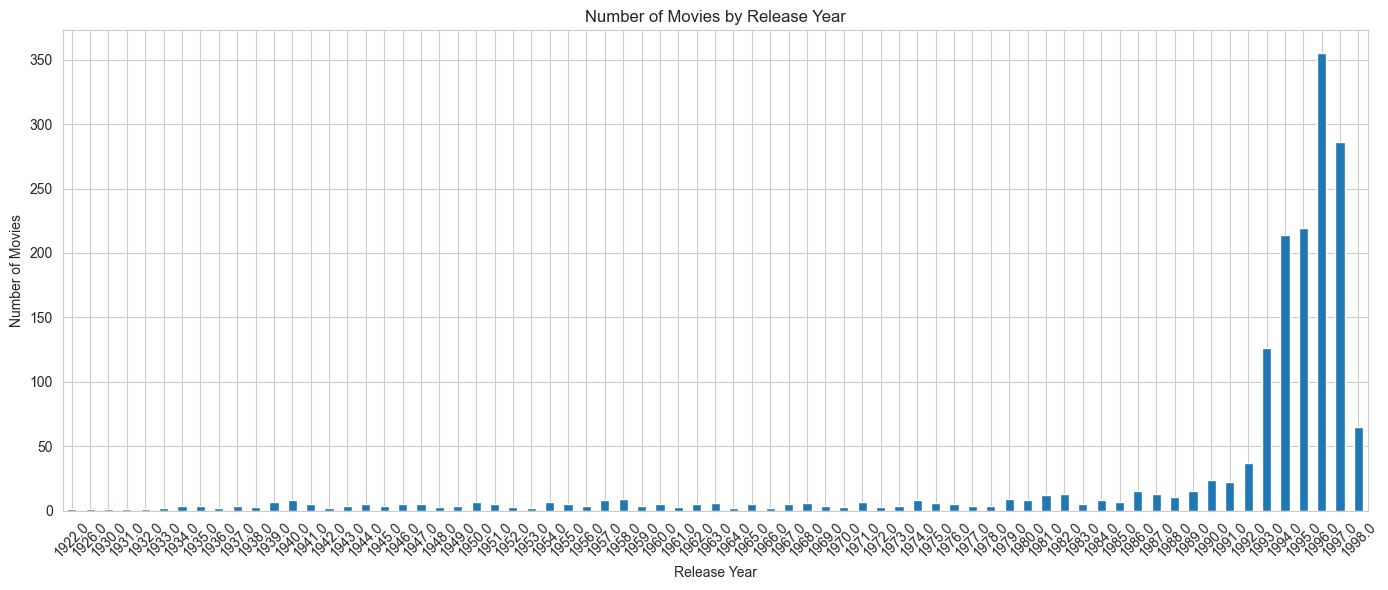

In [19]:
# Show movie release dates distribution
# Extract years from release_date
data['movies']['year'] = pd.to_datetime(data['movies']['release_date'], 
                                       errors='coerce').dt.year

# Count movies by year
year_counts = data['movies']['year'].value_counts().sort_index()

# Plot movies by year
plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ratings dataset shape: (100000, 4)

First 5 rows of ratings data:
   user_id  movie_id  rating           timestamp
0      196       242       3 1997-12-04 15:55:49
1      186       302       3 1998-04-04 19:22:22
2       22       377       1 1997-11-07 07:18:36
3      244        51       2 1997-11-27 05:02:03
4      166       346       1 1998-02-02 05:33:16


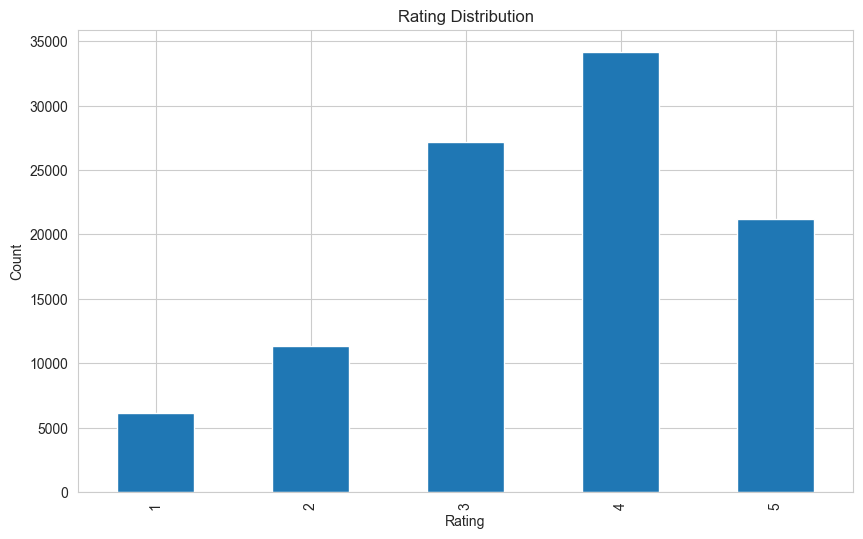


Rating statistics:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [20]:
# Display the first few rows of the ratings dataframe
print("Ratings dataset shape:", data["ratings"].shape)
print("\nFirst 5 rows of ratings data:")
print(data["ratings"].head().to_string())

# Show rating distribution
plt.figure(figsize=(10, 6))
rating_counts = data["ratings"]["rating"].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

# Basic statistics of ratings
print("\nRating statistics:")
print(data["ratings"]["rating"].describe())

Sample movie genres:
   movie_id                         genres
0         1  [animation, children, comedy]
1         2  [action, adventure, thriller]
2         3                     [thriller]
3         4        [action, comedy, drama]
4         5       [crime, drama, thriller]


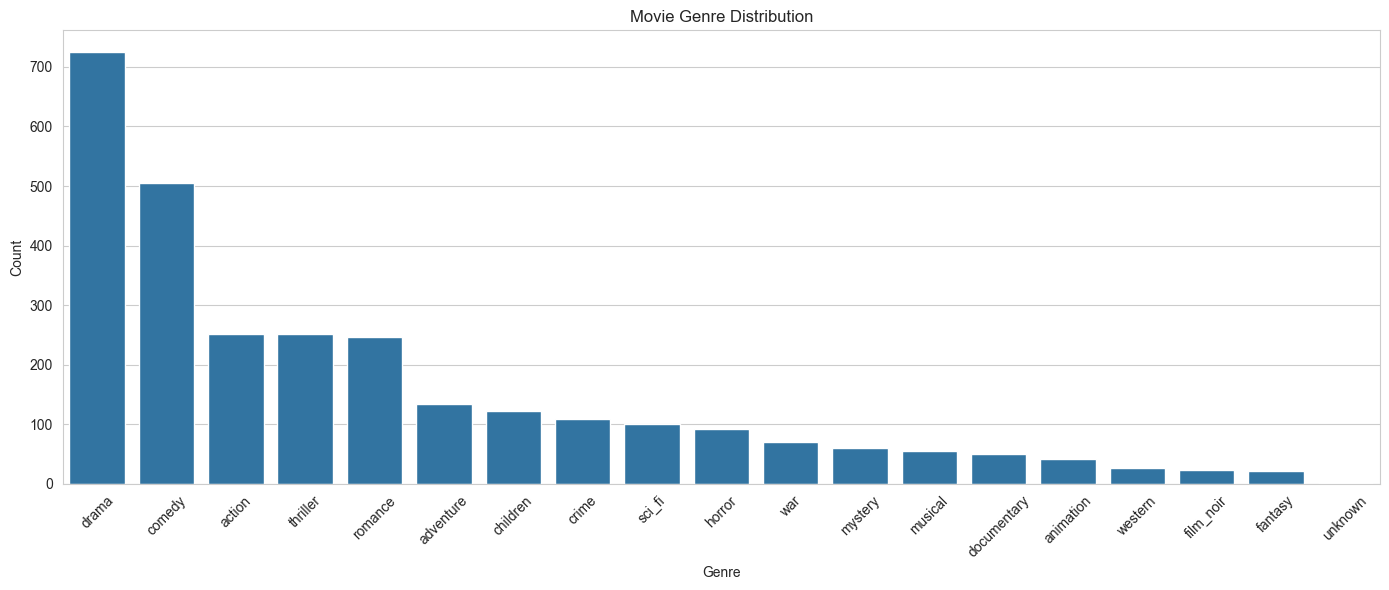


Top 5 most common genres:
       Genre  Count
6      drama    725
2     comedy    505
3     action    251
5   thriller    251
10   romance    247


In [21]:
# Get movie genres
movie_genres = get_movie_genres(data["movies"], data["genres"])
print("Sample movie genres:")
print(movie_genres.head().to_string())

# Count genre occurrences
genre_counts = {}
for _, row in movie_genres.iterrows():
    for genre in row["genres"]:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values('Count', ascending=False)

# Plot genre distribution
plt.figure(figsize=(14, 6))
sns.barplot(x='Genre', y='Count', data=genre_df)
plt.title("Movie Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 5 most common genres:")
print(genre_df.head().to_string())

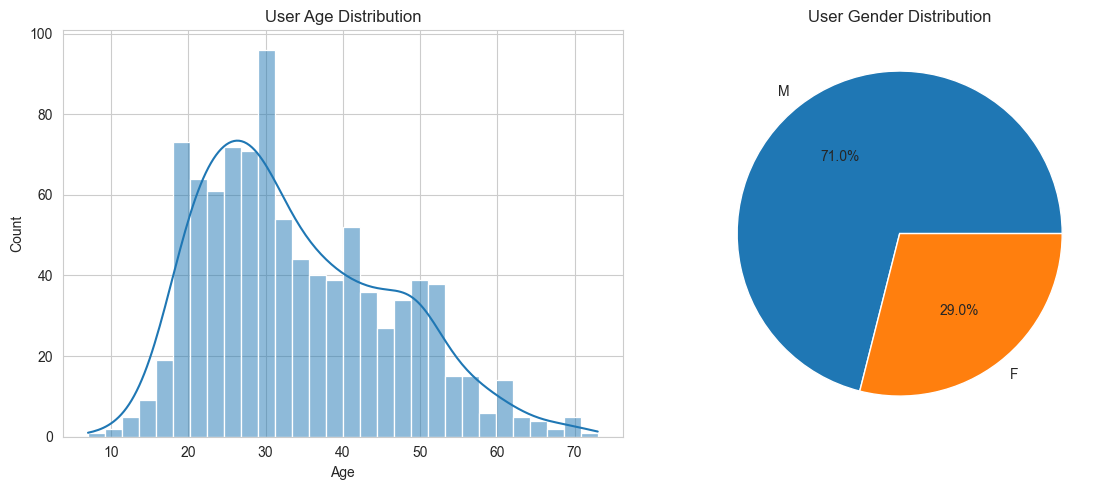

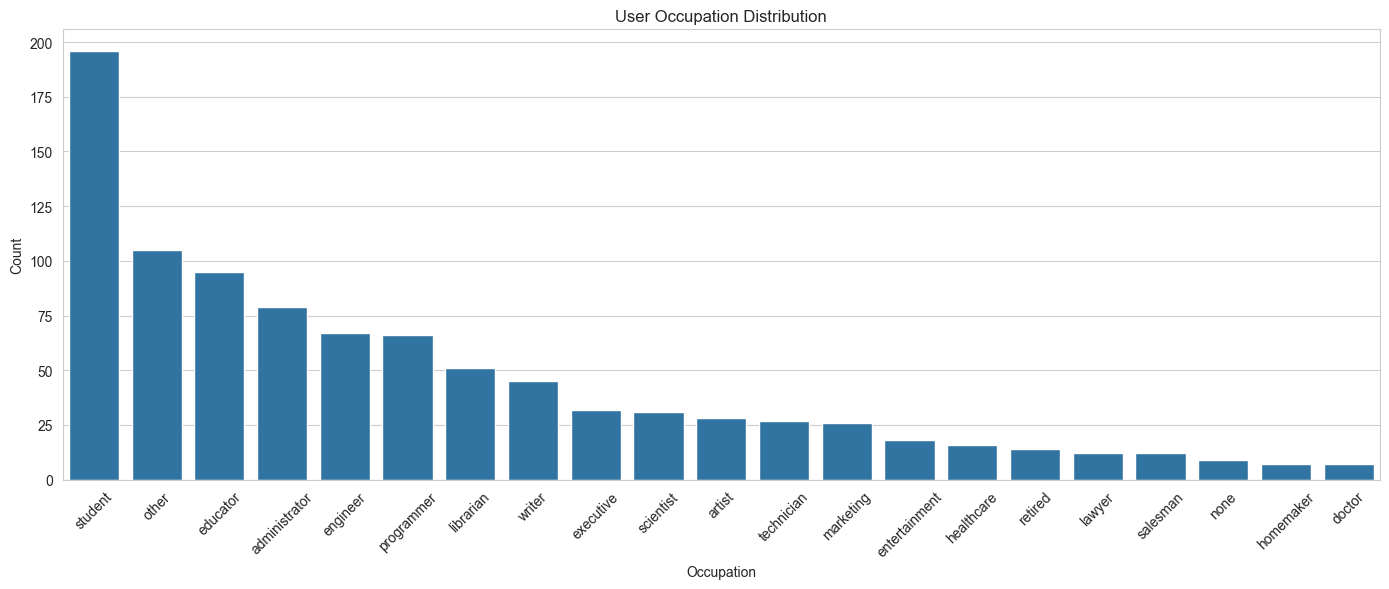

In [22]:
# User age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data["users"]["age"], bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# User gender distribution
plt.subplot(1, 2, 2)
gender_counts = data["users"]["gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("User Gender Distribution")
plt.tight_layout()
plt.show()

# User occupation distribution
plt.figure(figsize=(14, 6))
occupation_counts = data["users"]["occupation"].value_counts()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title("User Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

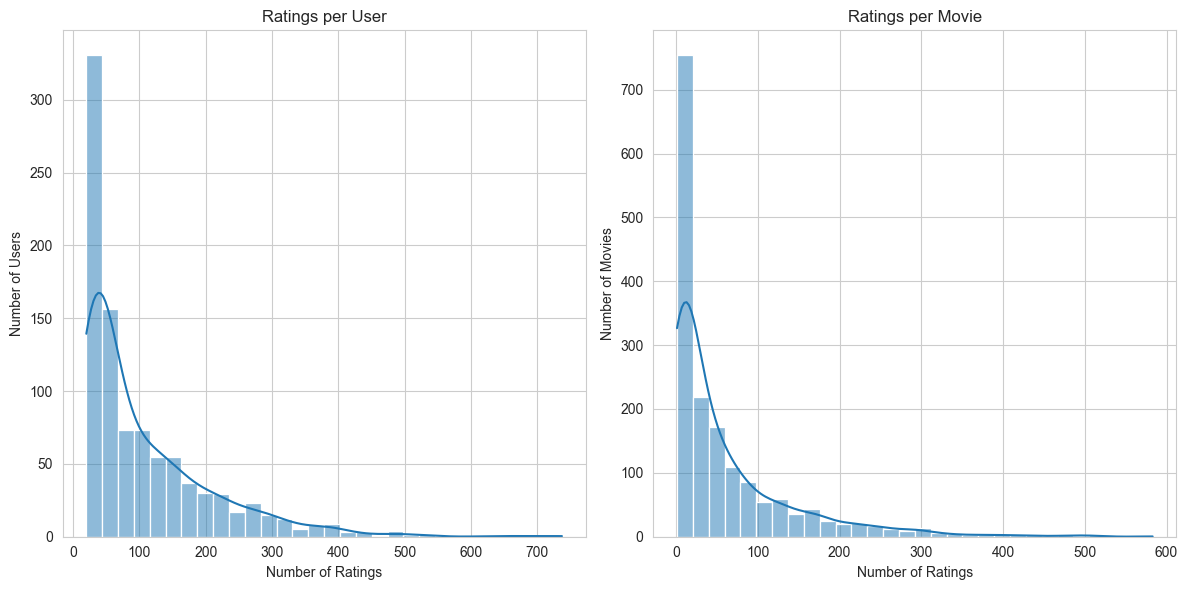

Average ratings per user: 106.04
Average ratings per movie: 59.45
Most active user rated 737 movies
Most rated movie has 583 ratings


In [23]:
# Number of ratings per user
user_activity = data["ratings"]["user_id"].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_activity, bins=30, kde=True)
plt.title("Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")

# Number of ratings per movie
movie_popularity = data["ratings"]["movie_id"].value_counts()

plt.subplot(1, 2, 2)
sns.histplot(movie_popularity, bins=30, kde=True)
plt.title("Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

print(f"Average ratings per user: {user_activity.mean():.2f}")
print(f"Average ratings per movie: {movie_popularity.mean():.2f}")
print(f"Most active user rated {user_activity.max()} movies")
print(f"Most rated movie has {movie_popularity.max()} ratings")

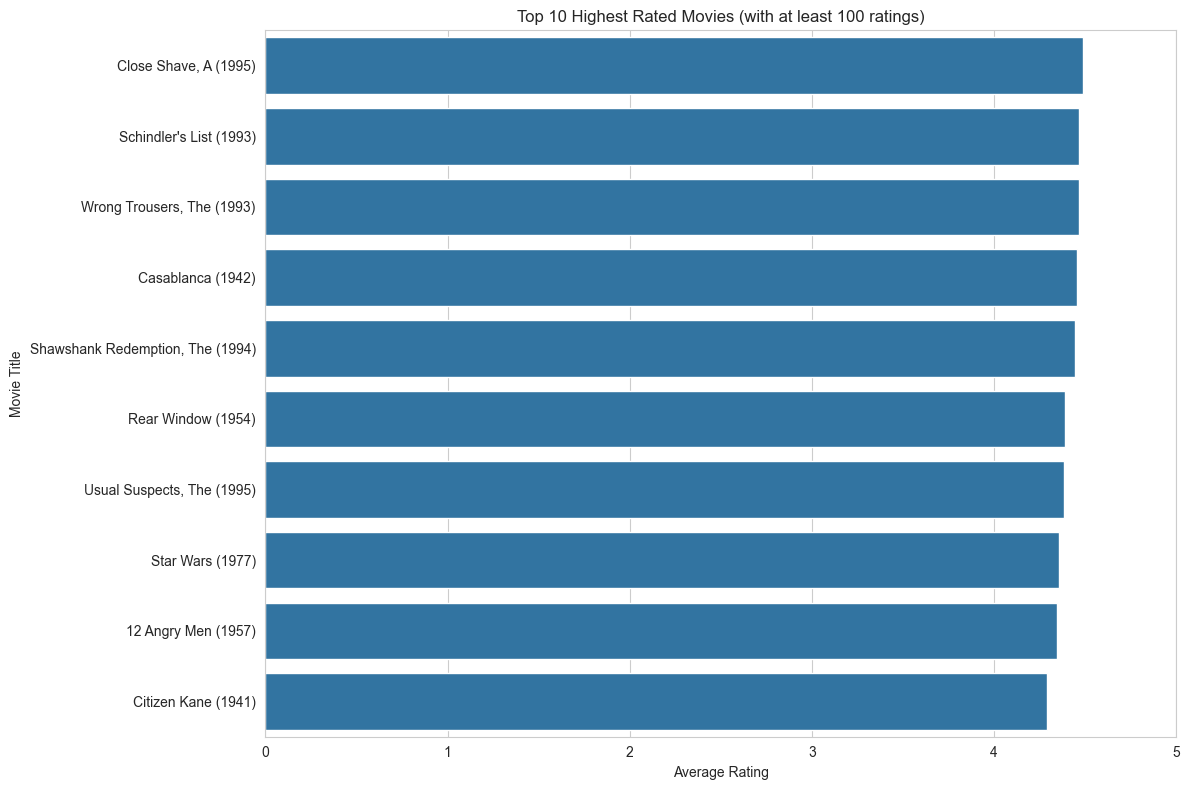

Top 10 highest rated movies:
                           title     mean  count
           Close Shave, A (1995) 4.491071    112
         Schindler's List (1993) 4.466443    298
      Wrong Trousers, The (1993) 4.466102    118
               Casablanca (1942) 4.456790    243
Shawshank Redemption, The (1994) 4.445230    283
              Rear Window (1954) 4.387560    209
      Usual Suspects, The (1995) 4.385768    267
                Star Wars (1977) 4.358491    583
             12 Angry Men (1957) 4.344000    125
             Citizen Kane (1941) 4.292929    198


In [25]:
# Calculate average rating per movie
movie_avg_ratings = data["ratings"].groupby("movie_id")["rating"].agg(["mean", "count"])

# Find top rated movies with at least 100 ratings
popular_movies = movie_avg_ratings[movie_avg_ratings["count"] >= 100].sort_values("mean", ascending=False)

# Merge with movie information
top_movies = popular_movies.head(10).reset_index()
top_movies = top_movies.merge(data["movies"][["movie_id", "title"]], on="movie_id")

# Plot top rated movies
plt.figure(figsize=(12, 8))
sns.barplot(x="mean", y="title", data=top_movies)
plt.title("Top 10 Highest Rated Movies (with at least 100 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.xlim(0, 5)  # Rating scale is 1-5
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print("Top 10 highest rated movies:")
print(top_movies[["title", "mean", "count"]].to_string(index=False))